### Nytt test för att se om jag - trots tidigare beslut - ändå ska ta bort outliers, eftersom jag ser att prediktionen stämmer rätt dåligt.   
Kopierat eda_taxi.ipynb för att slippa skriva om all kod. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from taxipred.utils.constants import DATA_PATH


df = pd.read_csv(DATA_PATH /"taxi_trip_pricing.csv")

#Skriver ut de 5 första raderna i datasetet
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [2]:
df.shape

(1000, 11)

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,950.0,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,950.0,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,950.0,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,950.0,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,950.0,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,950.0,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,951.0,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [5]:
df.isna().sum()



Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [6]:
df.value_counts()

Trip_Distance_km  Time_of_Day  Day_of_Week  Passenger_Count  Traffic_Conditions  Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  Trip_Duration_Minutes  Trip_Price
1.270000          Morning      Weekday      2.0              High                Clear    4.47       0.62         0.16             37.99                  11.335800     1
1.540000          Afternoon    Weekday      3.0              High                Clear    3.62       1.56         0.38             10.13                  9.871800      1
1.560000          Afternoon    Weekday      4.0              High                Clear    2.93       1.31         0.37             79.16                  34.262800     1
1.640000          Afternoon    Weekday      3.0              Low                 Clear    3.32       1.53         0.44             61.16                  32.739600     1
1.710000          Morning      Weekday      4.0              High                Clear    4.45       1.27         0.18             87.85                  2

In [7]:
df_with_nulls = df[df.isnull().any(axis=1)]
print(df_with_nulls)


     Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
1               47.59   Afternoon     Weekday              1.0   
3               30.33     Evening     Weekday              4.0   
4                 NaN     Evening     Weekday              3.0   
6                3.85   Afternoon     Weekday              4.0   
7               43.44     Evening     Weekend              3.0   
..                ...         ...         ...              ...   
991             35.04     Morning     Weekend              4.0   
993               NaN     Morning     Weekday              3.0   
996             45.95       Night     Weekday              4.0   
997              7.70     Morning     Weekday              3.0   
999             22.85     Morning     Weekend              3.0   

    Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
1                 High   Clear        NaN         0.62             0.43   
3                  Low     NaN       3.48         0.51   

In [20]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [10]:
#Gör en df som enbart innehåller numeriska kategorier
df_numerics = df.select_dtypes(include="number")
df_numerics

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,3.0,3.56,0.80,0.32,53.82,36.2624
1,47.59,1.0,NaN,0.62,0.43,40.57,NaN
2,36.87,1.0,2.70,1.21,0.15,37.27,52.9032
3,30.33,4.0,3.48,0.51,0.15,116.81,36.4698
4,NaN,3.0,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...
995,5.49,4.0,2.39,0.62,0.49,58.39,34.4049
996,45.95,4.0,3.12,0.61,NaN,61.96,62.1295
997,7.70,3.0,2.08,1.78,NaN,54.18,33.1236
998,47.56,1.0,2.67,0.82,0.17,114.94,61.2090


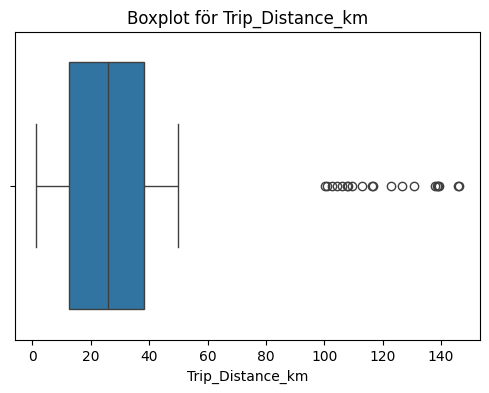

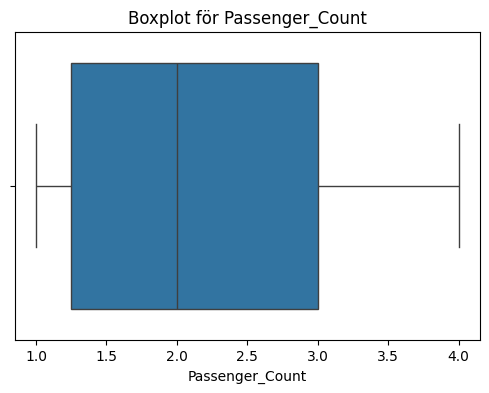

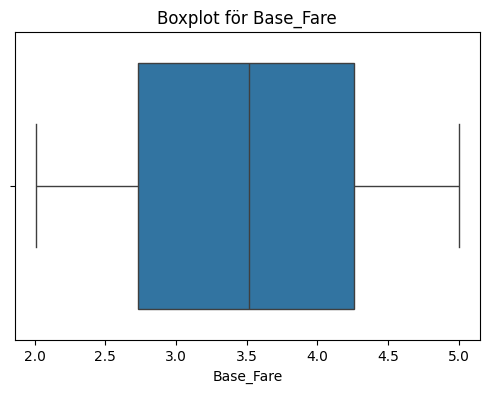

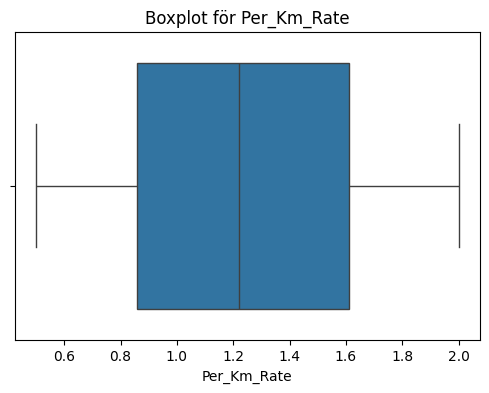

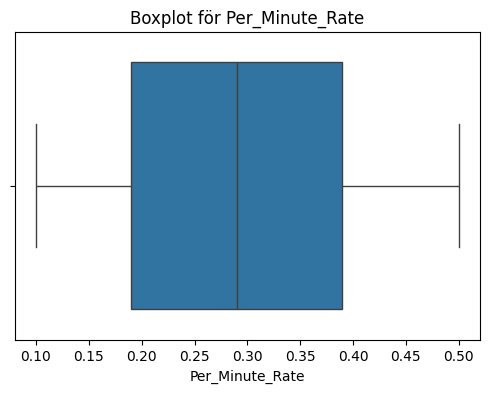

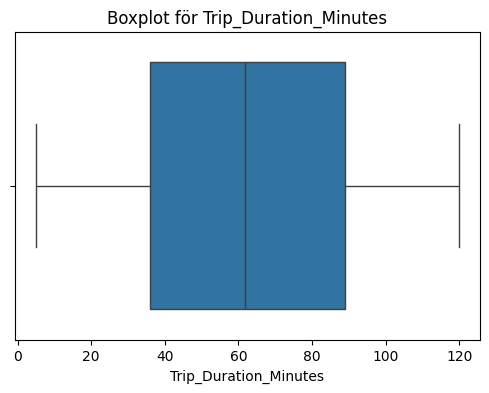

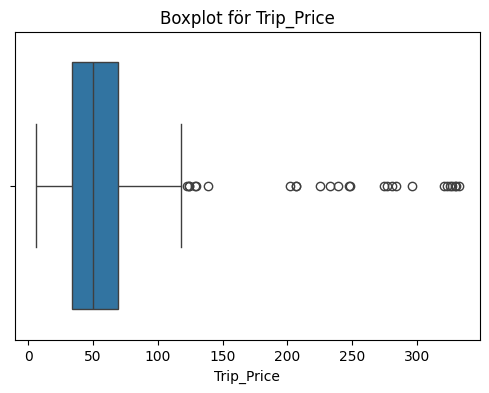

In [ ]:
#Boxplot för samtliga numeriska kolumner, för att se vilka som innehåller outliers

for col in df_numerics.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_numerics[col])
    plt.title(f"Boxplot för {col}")
    plt.show()

Filtrera bort alla nullvärden från trip_distance och trip_price

In [13]:
distance = "Trip_Distance_km"
price = "Trip_Price"

df_outliers = df.copy()

df_outliers = df_outliers.dropna(subset= [distance, price])

df_ = df_outliers[(df_outliers[distance] > 0) & (df_outliers[price] > 0)]
print(len(df_))

901


Hitta antal outliers i distance

In [32]:
q1 = df_[distance].quantile(0.25)
q3 = df_[distance].quantile(0.75)
iqr = q3 - q1

lower_d = q1 - 1.5 * iqr
upper_d = q3 + 1.5 * iqr

mask_outliers_distance = (df_[distance] < lower_d) | (df_[distance] > upper_d)

print("Outliers:", mask_outliers_distance.sum())

Outliers: 20


Hitta antal outliers i price

In [33]:
q1 = df_[price].quantile(0.25)
q3 = df_[price].quantile(0.75)
iqr = q3 - q1

lower_p = q1 - 1.5 * iqr
upper_p = q3 + 1.5 * iqr

mask_outliers_price = (df_[price] < lower_p) | (df_[price] > upper_p)
print("Outliers:", mask_outliers_price.sum())

Outliers: 25


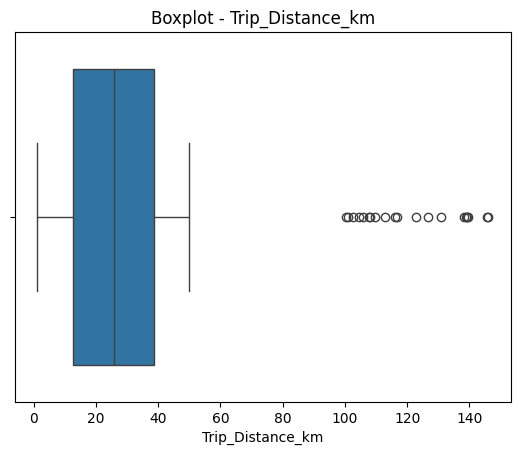

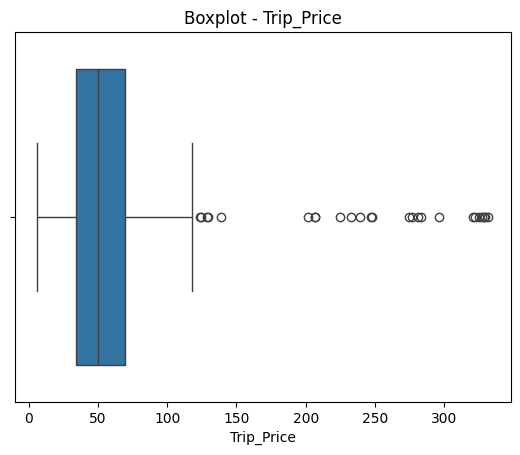

In [40]:
sns.boxplot(x=df_["Trip_Distance_km"])
plt.title("Boxplot - Trip_Distance_km")
plt.show()

sns.boxplot(x=df_["Trip_Price"])
plt.title("Boxplot - Trip_Price")
plt.show()

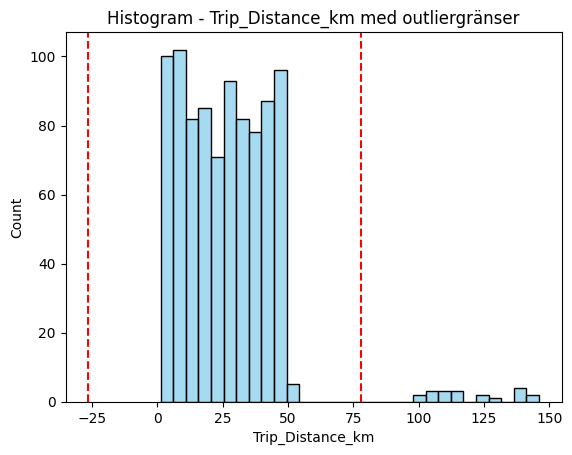

In [ ]:
# Histogram för distance

sns.histplot(df_["Trip_Distance_km"], bins=30, kde=False, color="skyblue")
plt.axvline(lower_d, color="red", linestyle="--")
plt.axvline(upper_d, color="red", linestyle="--")
plt.title("Histogram - Trip_Distance_km med outliergränser")
plt.show()



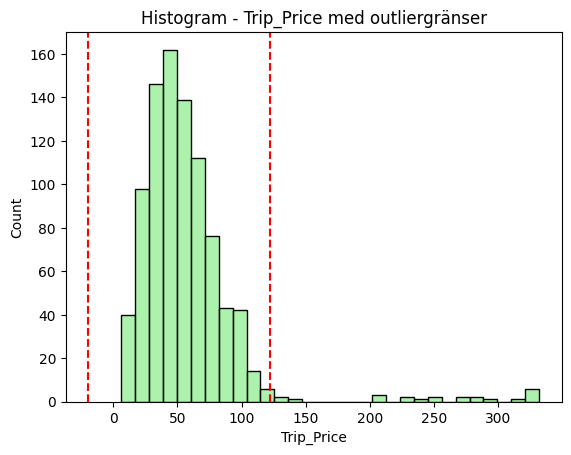

In [ ]:
# Histogram för price
sns.histplot(df_["Trip_Price"], bins=30, kde=False, color="lightgreen")
plt.axvline(lower_p, color="red", linestyle="--")
plt.axvline(upper_p, color="red", linestyle="--")
plt.title("Histogram - Trip_Price med outliergränser")
plt.show()

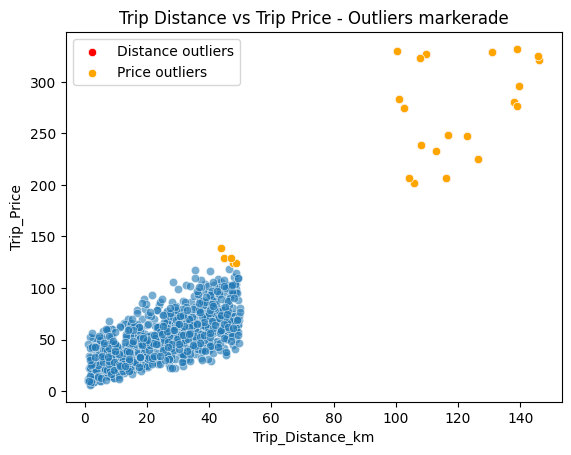

In [43]:
sns.scatterplot(data=df_, x="Trip_Distance_km", y="Trip_Price", alpha=0.6)

# markera outliers (t.ex. distance)
sns.scatterplot(data=df_[mask_outliers_distance], x="Trip_Distance_km", y="Trip_Price", 
                color="red", label="Distance outliers")

# markera outliers (t.ex. price)
sns.scatterplot(data=df_[mask_outliers_price], x="Trip_Distance_km", y="Trip_Price", 
                color="orange", label="Price outliers")

plt.title("Trip Distance vs Trip Price - Outliers markerade")
plt.legend()
plt.show()

Ta bort outliers - distance och price.   
Spara till ny df (df_clean)

In [44]:

distance= "Trip_Distance_km"

q1_d = df_[distance].quantile(0.25)
q3_d = df_[distance].quantile(0.75)
iqr_d = q3_d - q1_d

lower_d = q1_d - 1.5 * iqr_d
upper_d = q3_d + 1.5 * iqr_d



In [45]:
price =  "Trip_Price" 

q1_p = df[price].quantile(0.25)
q3_p = df[price].quantile(0.75)
iqr_p = q3_p - q1_p
lower_p = q1_p - 1.5 * iqr_p
upper_p = q3_p + 1.5 * iqr_p

In [46]:
df_clean = df[
    (df[distance] >= lower_d) & (df[distance] <= upper_d) &
    (df[price] >= lower_p) & (df[price] <= upper_p)
].copy()

print(f"Original dataset: {len(df)} rader")
print(f"Utan outliers:    {len(df_clean)} rader")
print(f"Borttagna:        {len(df) - len(df_clean)} rader")

Original dataset: 1000 rader
Utan outliers:    876 rader
Borttagna:        124 rader


In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       876 non-null    float64
 1   Time_of_Day            831 non-null    object 
 2   Day_of_Week            835 non-null    object 
 3   Passenger_Count        833 non-null    float64
 4   Traffic_Conditions     828 non-null    object 
 5   Weather                833 non-null    object 
 6   Base_Fare              834 non-null    float64
 7   Per_Km_Rate            835 non-null    float64
 8   Per_Minute_Rate        831 non-null    float64
 9   Trip_Duration_Minutes  833 non-null    float64
 10  Trip_Price             876 non-null    float64
dtypes: float64(7), object(4)
memory usage: 82.1+ KB


____________________________

##### Hantera nullvärden i Time_Of_Day

In [53]:
print(df_clean["Time_of_Day"].value_counts(dropna=False))

Time_of_Day
Afternoon    326
Morning      242
Evening      182
Night         81
NaN           45
Name: count, dtype: int64


Grupperar datan på 'Time of day' och jämför med 'Trip Price' för att se om priset påverkas av vilke tid på dygnet som kunden åker. 

In [54]:
df_clean.groupby("Time_of_Day")["Trip_Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Time_of_Day,,,,,,,,
Afternoon,326.0,52.526255,23.606470,6.4729,33.527175,51.01305,68.438000,118.0321
Evening,182.0,52.604703,24.343566,8.6709,34.649025,48.34925,66.821825,114.9417
Morning,242.0,51.251713,23.412132,6.1269,32.996275,48.59415,65.768925,117.7468
Night,81.0,51.039348,21.250143,12.5567,34.578100,47.84690,66.536300,105.1440


Priset påverkas väldigt lite av tid på dygnet. Efter att ha testat med 'mode' i notebooken eda_objects beslutar jag att ersätta nullvärden med det mest vanligt förekommande tiden på dygnet, som i det här fallet är 'Afternoon'

In [55]:
df_clean.groupby("Time_of_Day")["Trip_Price"].mean()

Time_of_Day
Afternoon    52.526255
Evening      52.604703
Morning      51.251713
Night        51.039348
Name: Trip_Price, dtype: float64

In [58]:
most_common = df_clean["Time_of_Day"].mode()[0]
print(most_common)



Afternoon


In [59]:
df_clean["Time_of_Day"] = df_clean["Time_of_Day"].fillna(most_common)

In [60]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       876 non-null    float64
 1   Time_of_Day            876 non-null    object 
 2   Day_of_Week            835 non-null    object 
 3   Passenger_Count        833 non-null    float64
 4   Traffic_Conditions     828 non-null    object 
 5   Weather                833 non-null    object 
 6   Base_Fare              834 non-null    float64
 7   Per_Km_Rate            835 non-null    float64
 8   Per_Minute_Rate        831 non-null    float64
 9   Trip_Duration_Minutes  833 non-null    float64
 10  Trip_Price             876 non-null    float64
dtypes: float64(7), object(4)
memory usage: 82.1+ KB


##### Hantera nullvärden i "Day_of_week"
Efter att ha utforskat kolumnen i notebooken eda_objects ser jag att det är fler resor som sker på vardagar än på helger. Ersätter jag null-värden med weekday blir det ännu fler resor som utförs på veckordagar, vilken kan vara missvisande. Beslutar mig därför för att ersätta nullvärden med texten 'Unknown' i min rensade dataframe. 


In [61]:
df_clean["Day_of_Week"] = df_clean["Day_of_Week"].fillna("Unknown")

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       876 non-null    float64
 1   Time_of_Day            876 non-null    object 
 2   Day_of_Week            876 non-null    object 
 3   Passenger_Count        833 non-null    float64
 4   Traffic_Conditions     828 non-null    object 
 5   Weather                833 non-null    object 
 6   Base_Fare              834 non-null    float64
 7   Per_Km_Rate            835 non-null    float64
 8   Per_Minute_Rate        831 non-null    float64
 9   Trip_Duration_Minutes  833 non-null    float64
 10  Trip_Price             876 non-null    float64
dtypes: float64(7), object(4)
memory usage: 82.1+ KB


##### Hantera nullvärden i "Traffic conditions"
Efter att ha utforskat kolumnen i notebooken eda_objects ser jag att det finns en viss korrelation mellan mängden trafik och pris. Ersätter jag nullvärden med 'most common' finns risk att priset inte återspeglas i trafiksituationen. 
Jag bestämmer mig därför för att ändra värdet till Unknown även här. 

In [62]:
df_clean["Traffic_Conditions"] = df_clean["Traffic_Conditions"].fillna("Unknown")

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       876 non-null    float64
 1   Time_of_Day            876 non-null    object 
 2   Day_of_Week            876 non-null    object 
 3   Passenger_Count        833 non-null    float64
 4   Traffic_Conditions     876 non-null    object 
 5   Weather                833 non-null    object 
 6   Base_Fare              834 non-null    float64
 7   Per_Km_Rate            835 non-null    float64
 8   Per_Minute_Rate        831 non-null    float64
 9   Trip_Duration_Minutes  833 non-null    float64
 10  Trip_Price             876 non-null    float64
dtypes: float64(7), object(4)
memory usage: 82.1+ KB


##### Hantera nullvärden i "Weather"
Efter att ha utforskat kolumnen i notebooken eda_objects ser jag att det finns en viss korrelation mellan mängden väder och pris. Ersätter jag nullvärden med 'most common' finns det risk att det det blir en snedfördelning av 'Clear' i datasetet. Ersätter därför nullvärden med 'Unknown' även här. 

In [70]:
df_clean["Weather"] = df_clean["Weather"].fillna("Unknown")

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       876 non-null    float64
 1   Time_of_Day            876 non-null    object 
 2   Day_of_Week            876 non-null    object 
 3   Passenger_Count        876 non-null    float64
 4   Traffic_Conditions     876 non-null    object 
 5   Weather                876 non-null    object 
 6   Base_Fare              834 non-null    float64
 7   Per_Km_Rate            835 non-null    float64
 8   Per_Minute_Rate        831 non-null    float64
 9   Trip_Duration_Minutes  833 non-null    float64
 10  Trip_Price             876 non-null    float64
dtypes: float64(7), object(4)
memory usage: 82.1+ KB


##### Hantera nullvärden i "Passenger_Count "
Efter att ha utforskat kolumnen i notebooken eda_numerics ser jag att korrelationen mellan antalet passagerare och pris är ganska liten. Antalet passagerare är även jämt fördelade. Utifrån detta bestämmer jag mig för att ersätta null-värdena med medianvärde för antal passagerare. Median-värdet är två passagerare. 

In [71]:
passengers_median = df_clean["Passenger_Count"].median()

df_clean["Passenger_Count"] = df_clean["Passenger_Count"].fillna(passengers_median)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       876 non-null    float64
 1   Time_of_Day            876 non-null    object 
 2   Day_of_Week            876 non-null    object 
 3   Passenger_Count        876 non-null    float64
 4   Traffic_Conditions     876 non-null    object 
 5   Weather                876 non-null    object 
 6   Base_Fare              834 non-null    float64
 7   Per_Km_Rate            835 non-null    float64
 8   Per_Minute_Rate        831 non-null    float64
 9   Trip_Duration_Minutes  833 non-null    float64
 10  Trip_Price             876 non-null    float64
dtypes: float64(7), object(4)
memory usage: 82.1+ KB


------------------------------

In [73]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,876.0,24.947683,14.332743,1.2300,12.152500,25.2700,37.59250,49.9900
Passenger_Count,876.0,2.463470,1.075350,1.0000,2.000000,2.0000,3.00000,4.0000
Base_Fare,834.0,3.506799,0.869040,2.0100,2.730000,3.5250,4.26000,5.0000
Per_Km_Rate,835.0,1.230419,0.430016,0.5000,0.860000,1.2200,1.61000,2.0000
Per_Minute_Rate,831.0,0.291961,0.115792,0.1000,0.190000,0.2900,0.39000,0.5000
Trip_Duration_Minutes,833.0,61.963337,32.433853,5.0100,35.480000,61.9300,89.15000,119.8400
Trip_Price,876.0,51.835674,23.510659,6.1269,33.355925,48.7955,66.56975,118.0321


### Ersätta nullvärden i övriga numeriska kategorier
Eftersom jag redan tagit bort outliers bedömer jag att jag kan ersätta överiga numeriska kolumner med medianvärde. 

In [76]:
for col in ["Base_Fare", "Per_Km_Rate", "Per_Minute_Rate", "Trip_Duration_Minutes"]:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [77]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       876 non-null    float64
 1   Time_of_Day            876 non-null    object 
 2   Day_of_Week            876 non-null    object 
 3   Passenger_Count        876 non-null    float64
 4   Traffic_Conditions     876 non-null    object 
 5   Weather                876 non-null    object 
 6   Base_Fare              876 non-null    float64
 7   Per_Km_Rate            876 non-null    float64
 8   Per_Minute_Rate        876 non-null    float64
 9   Trip_Duration_Minutes  876 non-null    float64
 10  Trip_Price             876 non-null    float64
dtypes: float64(7), object(4)
memory usage: 82.1+ KB


In [80]:
df_clean.to_csv("taxi_clean.csv", index=False)